Mean Reversion Strategy using Bollinger Bands¶
Mean reversion trading assumes the prices will move back to mean. Thus, whenever prices are too far from the mean we will take a position (Long or Short) and exit when the price reverts to mean.

In the below example, the mean reversion strategy is implemented on EURCHF.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

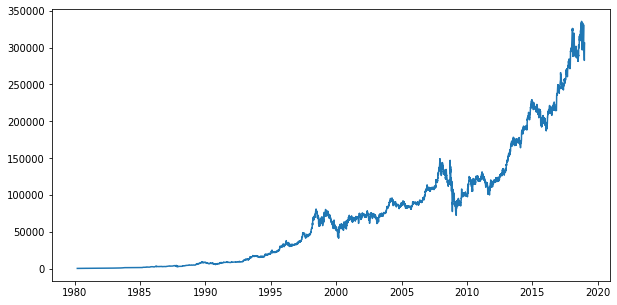

In [24]:
df = pd.read_csv("Homework/Brk-A.csv", parse_dates=True, index_col=0, header=0)
plt.figure(figsize=(10, 5))
plt.plot(df['Close'])
plt.show()

Moving average and moving standard deviation¶
Moving average is calculated using pandas rolling().mean() function as shown below:

DataFrame.column_name.rolling(lookback_period).mean()
Standard deviation is calculated using pandas rolling().std() function as shown below:

DataFrame.column_name.rolling(lookback_period).std(

In [29]:
lookback = 2
# Moving Average
df['moving_average'] = df['Close'].rolling(lookback).mean()

# Moving Standard Deviation
df['moving_std_dev'] = df['Close'].rolling(lookback).std()
df.head(7)

,Open,High,Low,Close,Adj Close,Volume,moving_average,moving_std_dev
Date,,,,,,,,
1980-03-17,290.0,310.0,290.0,290.0,290.0,10000,NaN,NaN
1980-03-18,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000
1980-03-19,290.0,310.0,290.0,290.0,290.0,20000,290.0,0.000000
1980-03-20,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000
1980-03-21,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000
1980-03-24,290.0,290.0,270.0,270.0,270.0,10000,280.0,14.142136
1980-03-25,270.0,270.0,270.0,270.0,270.0,0,270.0,0.000000


## Upper band and lower band

The upper band is +0.5 * standard deviations above the moving average and the lower band is -0.5 * standard deviation below the moving average.


In [30]:
df['upper_band'] = df.moving_average + 0.5*df.moving_std_dev
df['lower_band'] = df.moving_average - 0.5*df.moving_std_dev

## Long entry and long exit

Long_entry is set to True value whenever the price falls below the lower band and False otherwise.

Long_exit is set to True value whenever the prices mean-reverts to the current moving average (prices >= moving average) and False otherwise.


In [35]:
df['long_entry'] = df['Close'] < df.lower_band
df['long_exit'] = df['Close'] >= df.moving_average
df.head(7)

,Open,High,Low,Close,Adj Close,Volume,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit
Date,,,,,,,,,,,,
1980-03-17,290.0,310.0,290.0,290.0,290.0,10000,NaN,NaN,NaN,NaN,False,False
1980-03-18,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True
1980-03-19,290.0,310.0,290.0,290.0,290.0,20000,290.0,0.000000,290.000000,290.000000,False,True
1980-03-20,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True
1980-03-21,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True
1980-03-24,290.0,290.0,270.0,270.0,270.0,10000,280.0,14.142136,287.071068,272.928932,True,False
1980-03-25,270.0,270.0,270.0,270.0,270.0,0,270.0,0.000000,270.000000,270.000000,False,True


## Short entry and short exit

The Short entry is set to True value whenever the price rises above the upper band and False otherwise.

The Short exit is set to True value whenever the prices mean-reverts to the current moving average (prices <= moving average) and False otherwise.

In [42]:
df['short_entry'] = df['Close'] > df.upper_band
df['short_exit'] = df['Close']<= df.moving_average
df.head(7)

,Open,High,Low,Close,Adj Close,Volume,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,short_entry,short_exit
Date,,,,,,,,,,,,,,
1980-03-17,290.0,310.0,290.0,290.0,290.0,10000,NaN,NaN,NaN,NaN,False,False,False,False
1980-03-18,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True,False,True
1980-03-19,290.0,310.0,290.0,290.0,290.0,20000,290.0,0.000000,290.000000,290.000000,False,True,False,True
1980-03-20,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True,False,True
1980-03-21,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True,False,True
1980-03-24,290.0,290.0,270.0,270.0,270.0,10000,280.0,14.142136,287.071068,272.928932,True,False,False,True
1980-03-25,270.0,270.0,270.0,270.0,270.0,0,270.0,0.000000,270.000000,270.000000,False,True,False,True


## Long positions and short positions

positions_long and positions_short columns is initialized with NaN values using np.nan. 1 is assigned to positions_long when long_entry is True and 0 when long_exit is True. Similarly, -1 and 0 are assigned to positions_short.

In [43]:
df['positions_long'] = np.nan
df.loc[df.long_entry, 'positions_long'] = 1
df.loc[df.long_exit, 'positions_long'] = 0

df['positions_short'] = np.nan
df.loc[df.short_entry, 'positions_short'] = -1
df.loc[df.short_exit, 'positions_short'] = 0

df.head(7)

,Open,High,Low,Close,Adj Close,Volume,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,short_entry,short_exit,positions_long,positions_short
Date,,,,,,,,,,,,,,,,
1980-03-17,290.0,310.0,290.0,290.0,290.0,10000,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
1980-03-18,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True,False,True,0.0,0.0
1980-03-19,290.0,310.0,290.0,290.0,290.0,20000,290.0,0.000000,290.000000,290.000000,False,True,False,True,0.0,0.0
1980-03-20,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True,False,True,0.0,0.0
1980-03-21,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True,False,True,0.0,0.0
1980-03-24,290.0,290.0,270.0,270.0,270.0,10000,280.0,14.142136,287.071068,272.928932,True,False,False,True,1.0,0.0
1980-03-25,270.0,270.0,270.0,270.0,270.0,0,270.0,0.000000,270.000000,270.000000,False,True,False,True,0.0,0.0


In [44]:
#fill na values
df = df.fillna(method='ffill')
df.head(7)

,Open,High,Low,Close,Adj Close,Volume,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,short_entry,short_exit,positions_long,positions_short
Date,,,,,,,,,,,,,,,,
1980-03-17,290.0,310.0,290.0,290.0,290.0,10000,NaN,NaN,NaN,NaN,False,False,False,False,NaN,NaN
1980-03-18,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True,False,True,0.0,0.0
1980-03-19,290.0,310.0,290.0,290.0,290.0,20000,290.0,0.000000,290.000000,290.000000,False,True,False,True,0.0,0.0
1980-03-20,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True,False,True,0.0,0.0
1980-03-21,290.0,290.0,290.0,290.0,290.0,0,290.0,0.000000,290.000000,290.000000,False,True,False,True,0.0,0.0
1980-03-24,290.0,290.0,270.0,270.0,270.0,10000,280.0,14.142136,287.071068,272.928932,True,False,False,True,1.0,0.0
1980-03-25,270.0,270.0,270.0,270.0,270.0,0,270.0,0.000000,270.000000,270.000000,False,True,False,True,0.0,0.0


In [45]:
#create position column
df['positions'] = df.positions_long + df.positions_short

In [50]:
# Calculate cumulative Strategy Returns
#Calculate daily returns
df['prices_difference'] = prices - prices.shift(1)
df['daily_returns'] = df.prices_difference / df.prices.shift(1)

# Calculate strategy returns
df['strategy_returns'] = df.positions.shift(1) * df.daily_returns

# Calculate cumulative returns
df['cumret'] = (df.strategy_returns+1).cumprod()

AttributeError: 'DataFrame' object has no attribute 'prices'

In [ ]:
df.cumret.plot(label='EURCHF', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

EXAMPLE Instructions

In a single line of the statement, store in df['short_entry'] True value when df.prices is more than df.upper_band and False value otherwise
Similarly, store in df['short_exit'] True value when df.prices is less than or equal to df.moving_average and False value otherwise

In [ ]:
# import libraries
import numpy as np
import pandas as pd    
# Read AUDCAD price series into df data frame
df = pd.read_csv('AUDCAD.csv',index_col=0)
# Moving Average
df['moving_average'] = df.prices.rolling(5).mean()
# Moving Standard Deviation
df['moving_std_dev'] = df.prices.rolling(5).std() 
# Compute Upper and lower band
df['upper_band'] = df.moving_average + 0.5*df.moving_std_dev
df['lower_band'] = df.moving_average - 0.5*df.moving_std_dev
# Determine long entry and exit points
df['long_entry'] = df.prices < df.lower_band   
df['long_exit'] = df.prices >= df.moving_average
# Type your code below
# Short Entry
df['short_entry'] = df.prices > df.upper_band   
# Short Exit
df['short_exit'] = df.prices <= df.moving_average
# Print last 5 rows of df
print(df.tail(5))